In [65]:
import re
import pandas as pd

# 数据提取

In [70]:
data = """
1. Max 3 周1-5晚上七点至九点6、7下午晚上均可。
2. Darry 3 周1-7晚7-10点均可
3. Lana🐾  2 周一、周末晚上7-10均可
4. J 每天晚上有空就参加 None
5. Joanna 3次 周一至周日晚7-10点均可
6. Coraline 随缘参加一周一次大概 None
7. Latitia 1 周五或周六晚上
8. Elaine 3 晚上有空就参加
9. Celine 2 九点后都可以
10. 笑颜 2 8点半以后都可以
11. h None 晚八点半以后
12. hzz 1 有空参加"""
with open("data.csv","w+") as f:
    f.write(data)
    

In [80]:
df = pd.read_csv("data.csv", sep=" ",header=None,names=["No.","Name", "Freq.","Avaliable time"])

In [81]:
df

,No.,Name,Freq.,Avaliable time
0,1.0,Max,3,周1-5晚上七点至九点6、7下午晚上均可。
1,2.0,Darry,3,周1-7晚7-10点均可
2,3.0,Lana🐾,2,周一、周末晚上7-10均可
3,4.0,J,每天晚上有空就参加,None
4,5.0,Joanna,3,周一至周日晚7-10点均可
5,6.0,Coraline,1,None
6,7.0,Latitia,1,周五或周六晚上
7,8.0,Elaine,3,晚上有空就参加
8,9.0,Celine,2,九点后都可以
9,10.0,笑颜,2,8点半以后都可以


In [84]:
df["No."] = df["No."].astype("int")

In [88]:
df.loc[4,"Freq"] = 

,Name,Freq.,Avaliable time
No.,,,
1,Max,3,周1-5晚上七点至九点6、7下午晚上均可。
2,Darry,3,周1-7晚7-10点均可
3,Lana🐾,2,周一、周末晚上7-10均可
4,J,每天晚上有空就参加,None
5,Joanna,3,周一至周日晚7-10点均可
6,Coraline,1,None
7,Latitia,1,周五或周六晚上
8,Elaine,3,晚上有空就参加
9,Celine,2,九点后都可以


In [165]:
#maplist =dict(zip(range(1,8),["一","二","三","四","五","六","七"]))
idx = ["7~8","8~9","9~10"]#pd.qcut(range(7,10),3, precision=0)
#cols = [f"周{maplist[i]}"  for i in range(1,8)]
cols = ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"] 
time_df = pd.DataFrame(data=0, columns=cols, index=idx)    

In [166]:
df["have_partin_times"] = [5,2,1,5,5,3,1,1,1,3,3,2]

In [167]:
time_df.iloc[:,:] = 7 #max and darry
time_df.iloc[:,[0,6]] =  time_df.iloc[:,[0,6]]  + 1 #luna
time_df.iloc[:,:] = time_df.iloc[:,:] + 5      #jonna
time_df.iloc[:,[4,5]] = time_df.iloc[:,[4,5]] + 1 #latitia
time_df.iloc[[2],:] = time_df.iloc[[2],:] + 5 #Celine 笑颜


In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

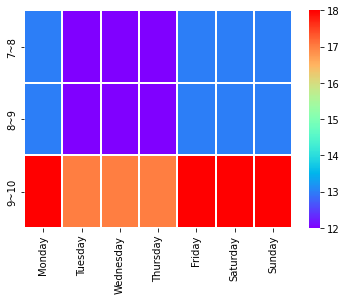

In [172]:
sns.heatmap(time_df,linewidths=0.05, cmap='rainbow')